In [259]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [260]:
loan_df = pd.read_csv("loan.csv")

In [261]:
## 2.Data Cleaning 
## to find the percentage of null values in each column
loan_df.isnull().sum()*100/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [262]:
## to drop the columns where all the values are null 
loan_df = loan_df.dropna(axis = 1, how = 'all')

In [263]:
### number of coulumns has reduced from 111 to 57
loan_df.shape

(39717, 57)

In [264]:
## to drop the columns which has only one value
oneuniquecolumns= loan_df.columns[loan_df.nunique() == 1]
print(oneuniquecolumns)
loan_df=loan_df.drop(oneuniquecolumns,axis=1)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [265]:
loan_df.shape

(39717, 48)

In [266]:
### drop the duplicate rows based on memberid
loan_df.duplicated(subset=['id']).any()

False

In [267]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [268]:
### change intrest rate and drop percentage 
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))

In [269]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [270]:
## clean emp_length , delete data where emp_length is null and convert it to int , will be used later for bivariate analysis
import re
print(loan_df.shape)
loan_df =loan_df[~loan_df["emp_length"].isnull()]
print(loan_df.shape)
loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: re.findall('\d+',str(x))[0])

(39717, 48)
(38642, 48)


In [271]:
print(loan_df.shape)
loan_df['loan_status'].value_counts()
loan_df = loan_df[loan_df["loan_status"]!='Current']
print(loan_df.shape)


(38642, 48)
(37544, 48)


In [272]:
loan_df["emp_length"] =loan_df["emp_length"].apply(lambda x:pd.to_numeric(x))

In [273]:
import math
## mths_since_last_delinq tells us A loan goes into default—which is the eventual consequence of extended payment delinquency—when the borrower fails to keep up with ongoing loan obligations or doesn't repay the loan according to the terms laid out in 
## the promissory note agreement (such as making insufficient payments).  hence we assuming as no deliquency if its nan , hence replacing with 0.
loan_df.isnull().sum()
loan_df['mths_since_last_delinq'].unique()
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].apply(lambda x:0 if math.isnan(x) else int(x))
loan_df['mths_since_last_delinq'].unique()

array([  0,  35,  61,   8,  20,  18,  45,  38,  48,  41,  40,  74,  25,
        53,  39,  10,  26,  77,  28,  56,  52,  24,  16,  60,  54,  23,
         9,  11,  13,  65,  19,  22,  59,  79,  44,  57,  14,  63,  49,
        15,  73,  70,  29,  51,   5,  55,   2,  30,  47,  75,  69,   4,
        43,  33,  21,  27,  46,  81,  68,  78,  82,  31,  64,  76,  62,
        72,  42,  50,   3,  12,  34,  58,  17,  71,  66,  32,   6,  80,
        36,  37,   7,  67,   1,  83,  86, 115,  96, 120, 106,  89, 103,
       107,  85,  97,  95])

In [274]:
## cleaning mths_since_last_record as well . Assumed if nan means there are no public records , hence equiating with zero.
loan_df['mths_since_last_record'].unique()
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].apply(lambda x:0 if math.isnan(x) else int(x))
loan_df['mths_since_last_record'].unique()


array([  0, 113, 105,  97,  33,  93,  52,  85,  90,  91,  92,  87,  45,
        83, 118,  38, 101, 100, 110,  88,  79, 114,  77, 107, 102,  98,
        95,  96, 116, 117, 103, 111,  89, 108,  29, 106,  53,  86,  57,
       115,  63,  94,  99, 112, 104,  76,  61,  28, 109,  23,  75,  47,
        82,  21,  62,  44,  80,  67, 119,  42,  34,  66,  58,  22,  72,
        64,  50,  69,  49,  74,  35,  12,  26,  78,  54,  37,  73,  11,
        31,  32,  81,  68,  55,  39,  51,  70,  30,  41,  71,  40,  27,
        59,  65,  46,  19,  17,  25,  13,  56,  48,  36,  43,   7,  60,
        14,   6,  18,  20, 120, 129,   5])

In [275]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   1408
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12097
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec   

In [276]:
## cleaning pub_rec_bankruptcies as well . Assumed if nan means there are no public records , hence equiating with zero.

loan_df['pub_rec_bankruptcies'].unique()
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].apply(lambda x:0 if math.isnan(x) else int(x))
loan_df['pub_rec_bankruptcies'].unique()

array([0, 1, 2])

In [277]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   1408
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12097
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec   

<Axes: >

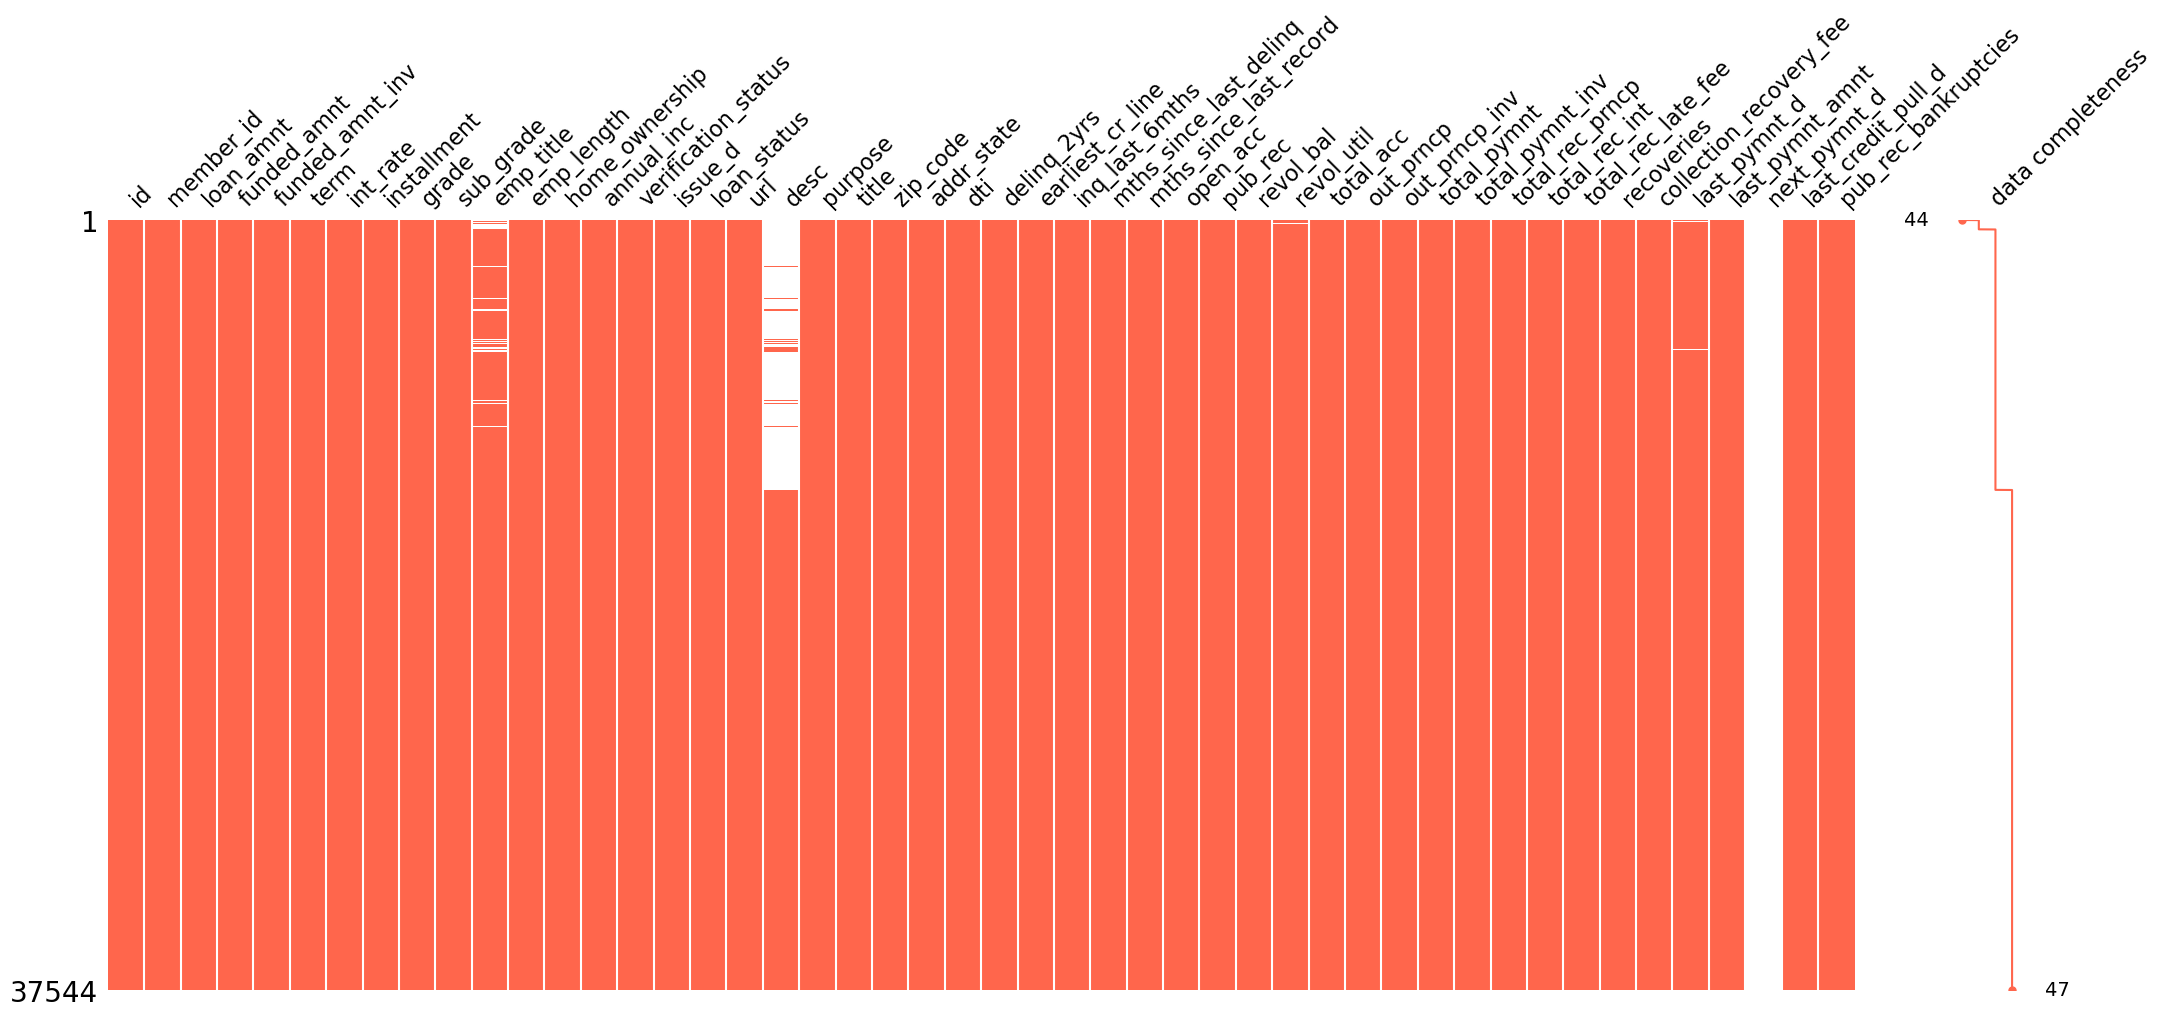

In [278]:
import missingno as msno
%matplotlib inline
msno.matrix(loan_df, labels=True, sort="ascending", color=(1, 0.4, 0.3))

In [279]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [280]:
loan_df['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [281]:
### Feature revol_util
loan_df.revol_util.replace(to_replace='%', value='', inplace=True, regex=True)
loan_df.revol_util=loan_df.revol_util.astype('float')

In [282]:
loan_df['revol_util'].fillna(loan_df['revol_util'].median(),inplace=True)
print(loan_df.revol_util.isnull().sum())

0


In [283]:
loan_df=loan_df.drop('desc',axis=1)
loan_df=loan_df.drop('next_pymnt_d',axis=1)


In [284]:
loan_df['emp_title']
loan_df=loan_df.drop('emp_title',axis=1)


<Axes: >

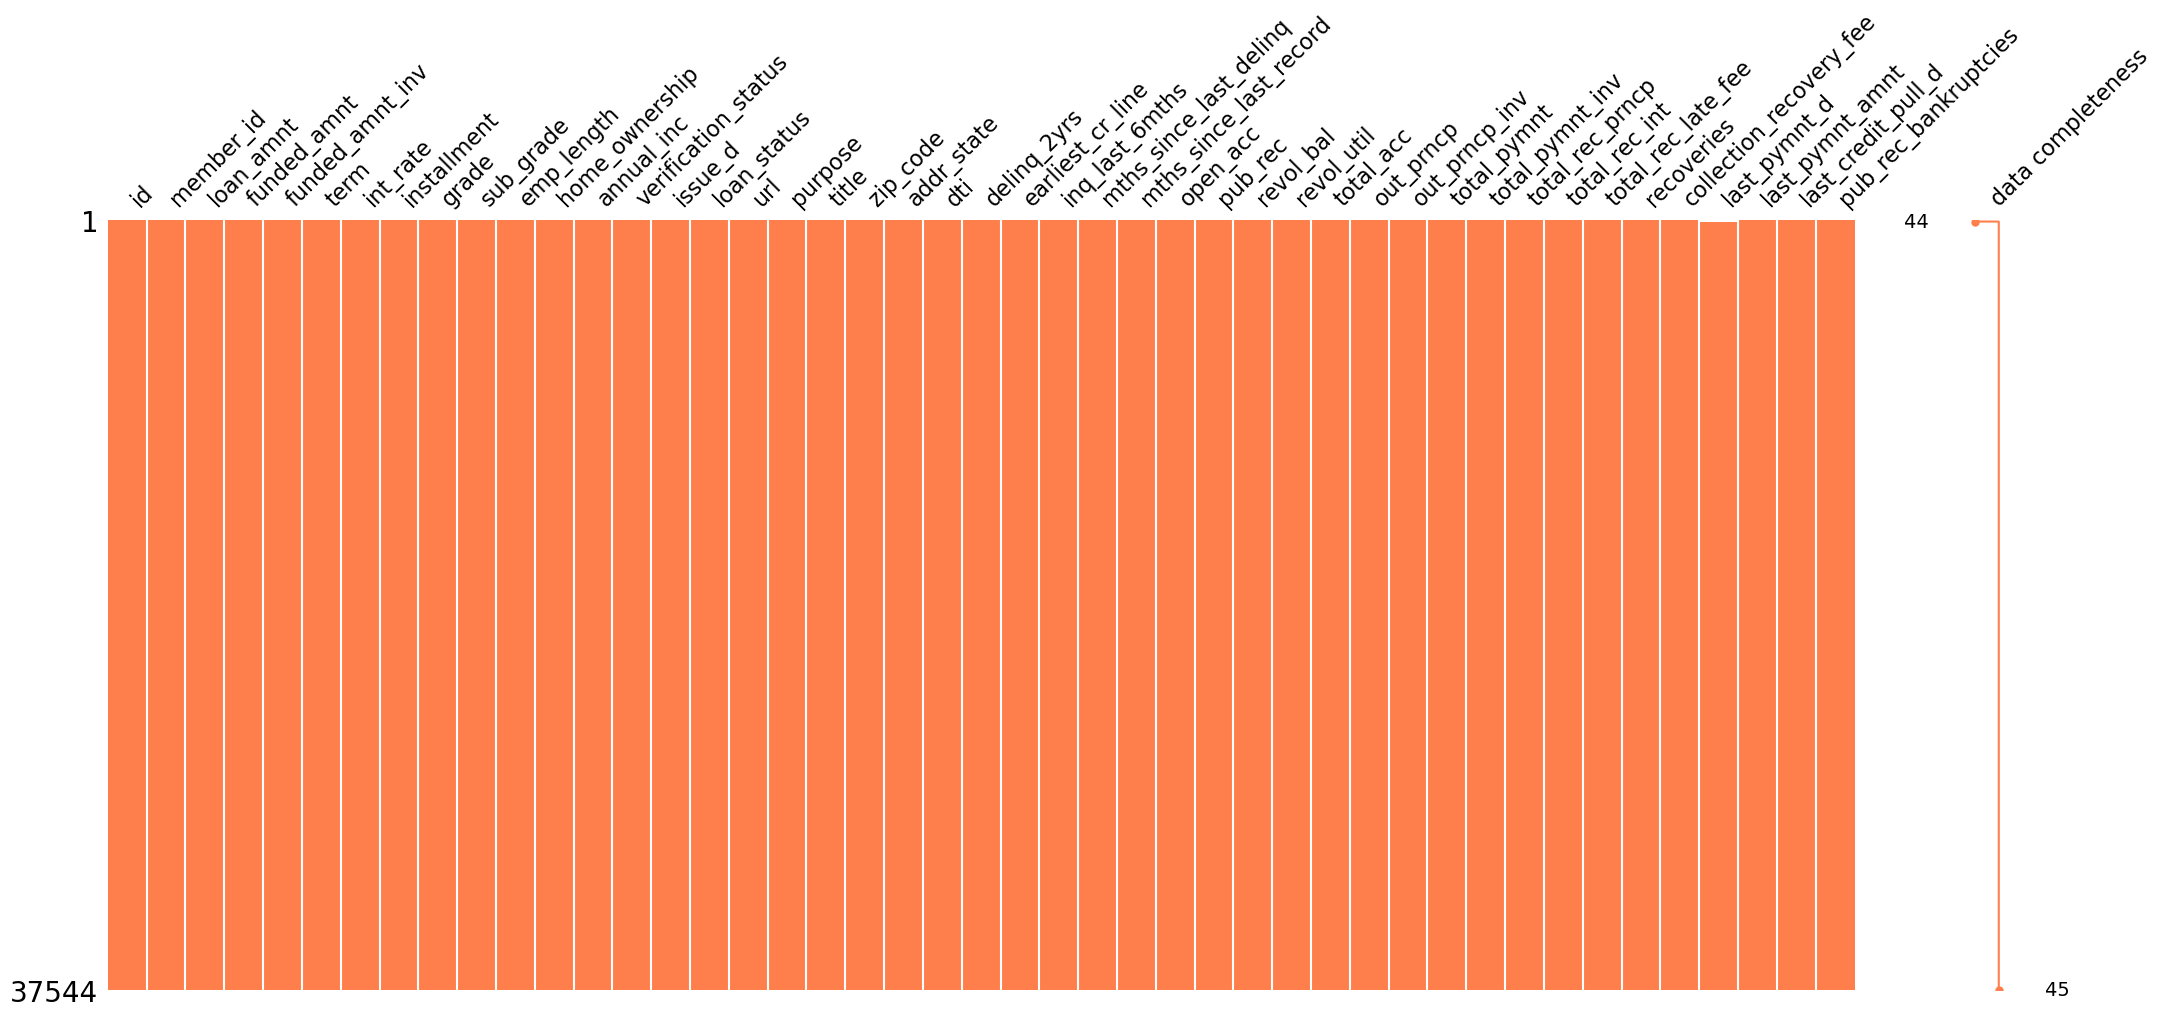

In [285]:
import missingno as msno
%matplotlib inline
msno.matrix(loan_df, labels=True, sort="ascending", color=(1, 0.5, 0.3))

In [286]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37544 non-null  int64  
 1   member_id                37544 non-null  int64  
 2   loan_amnt                37544 non-null  int64  
 3   funded_amnt              37544 non-null  int64  
 4   funded_amnt_inv          37544 non-null  float64
 5   term                     37544 non-null  object 
 6   int_rate                 37544 non-null  float64
 7   installment              37544 non-null  float64
 8   grade                    37544 non-null  object 
 9   sub_grade                37544 non-null  object 
 10  emp_length               37544 non-null  int64  
 11  home_ownership           37544 non-null  object 
 12  annual_inc               37544 non-null  float64
 13  verification_status      37544 non-null  object 
 14  issue_d               

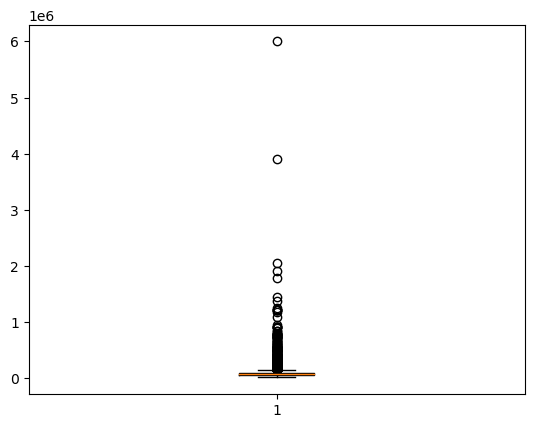

In [287]:
###Removing outliers
loan_df['annual_inc'] = loan_df['annual_inc'].astype(int)

plt.boxplot(loan_df['annual_inc'])
plt.show()

In [288]:
### outlier detection and removal
def determine_numerical_and_categorical_columns(dataframe):
    loan_df_numerical=loan_df.select_dtypes(exclude="object")
    loan_df_categorical=loan_df.select_dtypes(include="object")
    loan_df_numerical_cols=loan_df_numerical.columns.tolist()
    loan_df_categoical_cols=loan_df_categorical.columns.tolist()
    return loan_df_categorical,loan_df_numerical

In [289]:
categorical_columns ,continuous_columns = determine_numerical_and_categorical_columns(loan_df)
print("categorical_columns:=",categorical_columns.columns.tolist(), "\n continuous_columns:=",continuous_columns.columns.tolist())


categorical_columns:= ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] 
 continuous_columns:= ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


In [290]:
continuous_columns.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.754400e+04,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,...,37544.0,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000
mean,6.743002e+05,8.394864e+05,11119.329986,10853.560489,10280.495739,11.963319,324.650164,5.061048,6.940707e+04,13.284186,...,0.0,11957.010792,11348.809823,9720.124658,2137.018706,1.378980,98.488534,12.815757,2769.442228,0.041019
std,2.098464e+05,2.655176e+05,7354.098954,7096.316776,7034.124211,3.683012,208.901055,3.401750,6.467698e+04,6.660551,...,0.0,8823.936817,8719.604728,7020.466734,2395.346010,7.360282,704.389292,151.989005,4514.772596,0.199006
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.091155e+05,6.564908e+05,5500.000000,5400.000000,5000.000000,8.940000,167.370000,2.000000,4.100000e+04,8.160000,...,0.0,5565.271934,5074.037500,4552.150000,655.317500,0.000000,0.000000,0.000000,220.820000,0.000000
50%,6.534655e+05,8.352880e+05,10000.000000,9600.000000,8850.000000,11.830000,280.000000,4.000000,6.000000e+04,13.380000,...,0.0,9777.765034,9159.695000,8000.000000,1321.210000,0.000000,0.000000,0.000000,578.540000,0.000000
75%,8.269000e+05,1.034972e+06,15000.000000,15000.000000,14075.000000,14.420000,428.942500,9.000000,8.300000e+04,18.550000,...,0.0,16243.811330,15442.962500,13263.315000,2697.102500,0.000000,0.000000,0.000000,3494.710000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,...,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [291]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    outlier_length=0
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers_values=((dataframe[col_name] < (low_limit)) |(dataframe[col_name] > (up_limit)))
    outlier_length=len(dataframe[outliers_values])
    if dataframe[outliers_values].any(axis=None):
        return True,outlier_length
    else:
        return False,outlier_length

def replace_with_thresholds(dataframe, variable,q1,q2):
    low_limit, up_limit = outlier_thresholds(dataframe, variable,q1,q2)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    print("(row,col)",dataframe.shape)
    
def remove_with_thresholds(dataframe,variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable,0.5,0.75)
    outliers_values=((dataframe[variable] < (low_limit)) |(dataframe[variable] > (up_limit)))
    print("(row,col)",dataframe.shape)
     

In [292]:
outliers = []
def detectoutliers():
    # Outlier detection for continuous variables
    for col in continuous_columns:
        print(f"{col} :  {check_outlier(loan_df, col)}")
        

In [293]:
detectoutliers()


id :  (False, 0)
member_id :  (False, 0)
loan_amnt :  (False, 0)
funded_amnt :  (False, 0)
funded_amnt_inv :  (False, 0)
int_rate :  (False, 0)
installment :  (False, 0)
emp_length :  (False, 0)
annual_inc :  (True, 153)
dti :  (False, 0)
delinq_2yrs :  (True, 304)
inq_last_6mths :  (True, 14)
mths_since_last_delinq :  (False, 0)
mths_since_last_record :  (True, 1491)
open_acc :  (True, 4)
pub_rec :  (True, 9)
revol_bal :  (True, 179)
revol_util :  (False, 0)
total_acc :  (False, 0)
out_prncp :  (False, 0)
out_prncp_inv :  (False, 0)
total_pymnt :  (False, 0)
total_pymnt_inv :  (False, 0)
total_rec_prncp :  (False, 0)
total_rec_int :  (True, 70)
total_rec_late_fee :  (True, 337)
recoveries :  (True, 913)
collection_recovery_fee :  (True, 1150)
last_pymnt_amnt :  (True, 35)
pub_rec_bankruptcies :  (True, 1535)


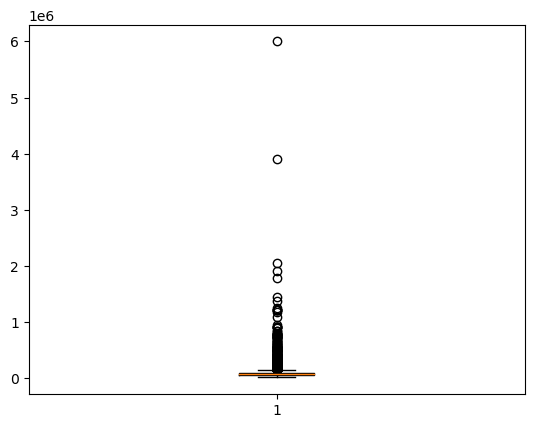

In [294]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

(row,col) (37544, 45)


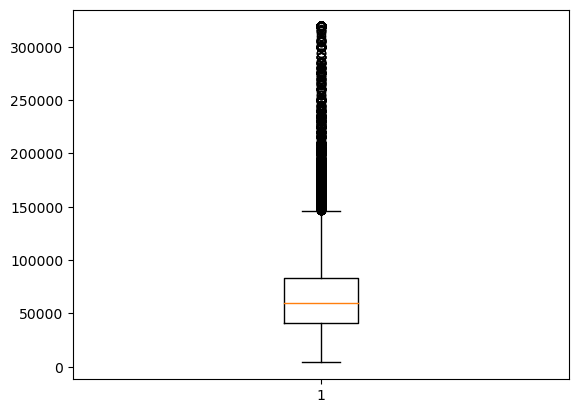

In [295]:
# for feature - annual_inc - any value above or below the outlier will be replaced to min and max respectively
replace_with_thresholds(loan_df, "annual_inc",0.05,0.95)
plt.boxplot(loan_df['annual_inc'])
plt.show()

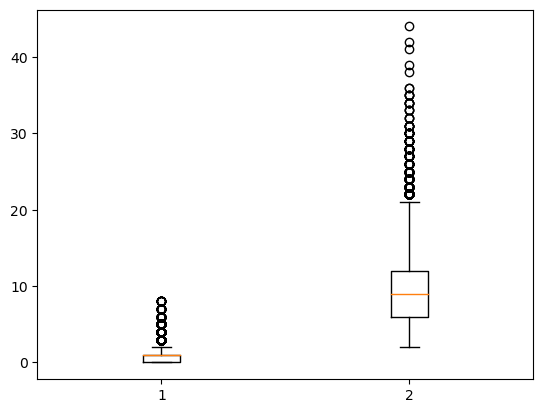

In [296]:
## feature inq_last_6mths, pub_rec_bankruptcies,open_acc,pub_rec
plt.boxplot(loan_df[['inq_last_6mths','open_acc']])
plt.show()

(row,col) (37544, 45)
(row,col) (37544, 45)


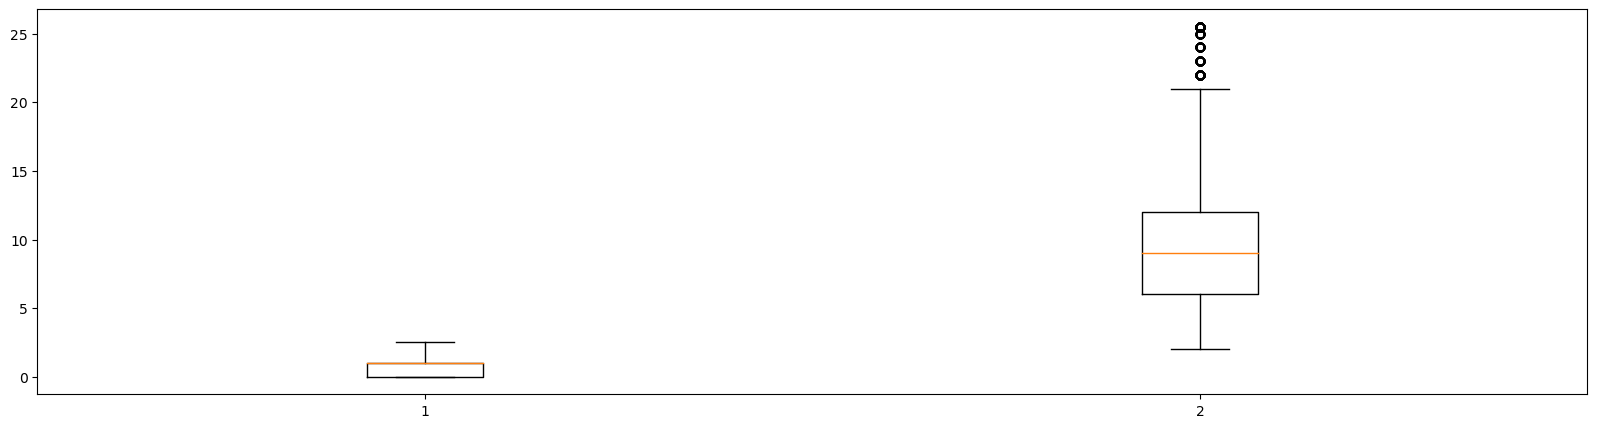

In [297]:
# for feature -  - any value above or below the outlier will be replaced to min and max respectively
columns=['inq_last_6mths','open_acc']
for col in columns:
    replace_with_thresholds(loan_df, col,0.05,0.75)
plt.figure(figsize=(20,5))
plt.boxplot(loan_df[['inq_last_6mths','open_acc']])
plt.show()

In [298]:
detectoutliers() 


id :  (False, 0)
member_id :  (False, 0)
loan_amnt :  (False, 0)
funded_amnt :  (False, 0)
funded_amnt_inv :  (False, 0)
int_rate :  (False, 0)
installment :  (False, 0)
emp_length :  (False, 0)
annual_inc :  (False, 0)
dti :  (False, 0)
delinq_2yrs :  (True, 304)
inq_last_6mths :  (False, 0)
mths_since_last_delinq :  (False, 0)
mths_since_last_record :  (True, 1491)
open_acc :  (False, 0)
pub_rec :  (True, 9)
revol_bal :  (True, 179)
revol_util :  (False, 0)
total_acc :  (False, 0)
out_prncp :  (False, 0)
out_prncp_inv :  (False, 0)
total_pymnt :  (False, 0)
total_pymnt_inv :  (False, 0)
total_rec_prncp :  (False, 0)
total_rec_int :  (True, 70)
total_rec_late_fee :  (True, 337)
recoveries :  (True, 913)
collection_recovery_fee :  (True, 1150)
last_pymnt_amnt :  (True, 35)
pub_rec_bankruptcies :  (True, 1535)


In [299]:
loan_df.shape


(37544, 45)

In [300]:
from datetime import datetime
### feature issue_d
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
### feature earliest_cr_line
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [301]:
##### issue_d
#
# extracting month and year from issue_d
loan_df['issue_d_Month'] = loan_df['issue_d'].apply(lambda x: x.month)
loan_df['issue_d_Year'] = loan_df['issue_d'].apply(lambda x: x.year)

#earliest_cr_line
# extracting month and year from issue_d
loan_df['earliest_cr_line_Month'] = loan_df['earliest_cr_line'].apply(lambda x: x.month)
loan_df['earliest_cr_line_Year'] = loan_df['earliest_cr_line'].apply(lambda x: x.year)

In [302]:
loan_df['approved_amount_ratio'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)


In [303]:
loan_df.head(3).append(loan_df.tail(3))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_Month,issue_d_Year,earliest_cr_line_Month,earliest_cr_line_Year,approved_amount_ratio
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0,12,2011,1,1985,99.50
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0,12,2011,4,1999,100.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0,12,2011,11,2001,100.00
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,0.00,Apr-08,0.00,Jun-07,0,7,2007,10,1998,26.50
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,0.00,Jan-08,0.00,Jun-07,0,7,2007,11,1988,13.00
39716,87023,86999,7500,7500,800.0,36 months,13.75,255.43,E,E2,...,0.00,Jun-10,256.59,Jun-10,0,6,2007,10,2003,10.67


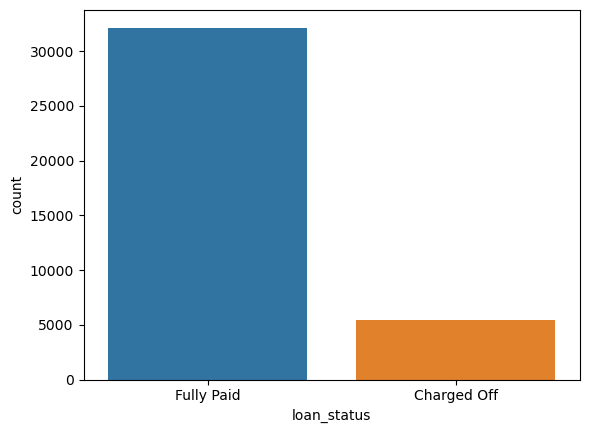

In [305]:
sns.countplot(x ='loan_status', data = loan_df)
plt.show()

<Axes: xlabel='approved_amount_ratio', ylabel='Density'>

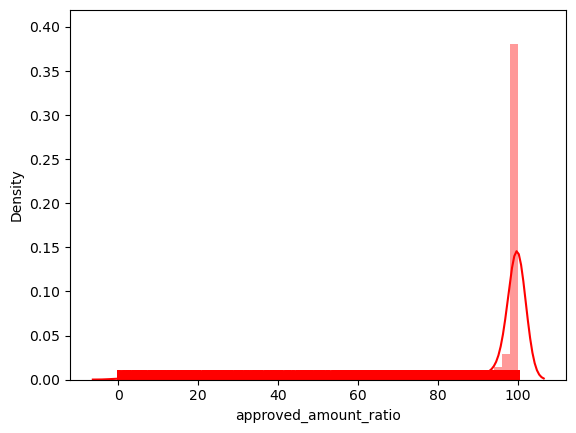

In [306]:
#to check for the percentage of the loan that was approved by the invester
sns.distplot(loan_df.approved_amount_ratio,color='red',rug=True)


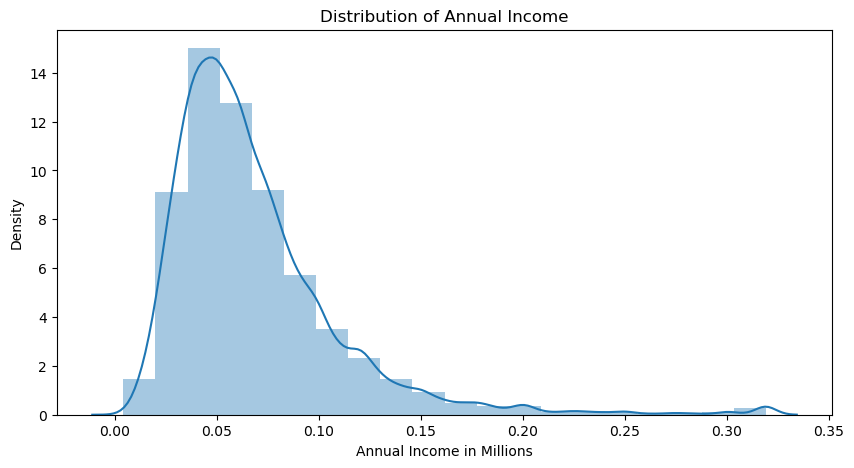

In [307]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_df.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

In [308]:
loan_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

loan_status  Charged Off  Fully Paid
term                                
 36 months          3073       25214
 60 months          2326        6931


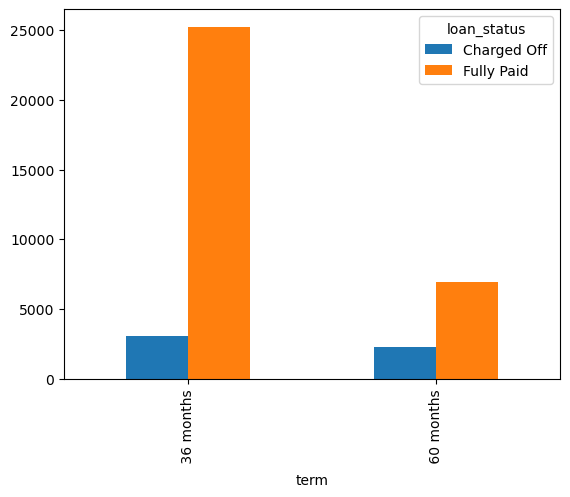

In [309]:
CrosstabResult=pd.crosstab(index=loan_df['term'],columns=loan_df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN

CrosstabResult.plot.bar()
plt.show()


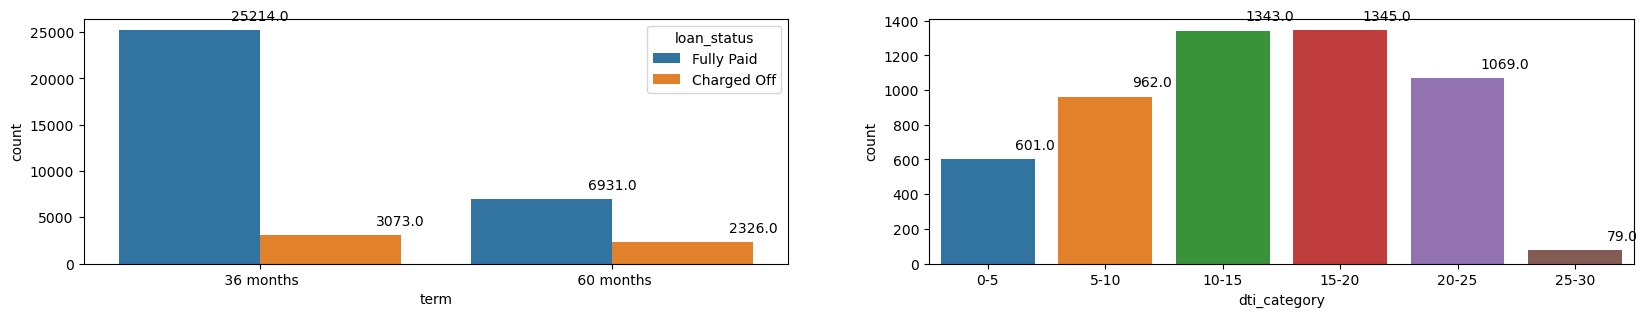

In [312]:
loan_df['dti']
loan_df['dti_category'] = pd.cut(loan_df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
fig, ax = plt.subplots(figsize = (20,7))
plt.subplot(221)
ax=sns.countplot(x='term', hue='loan_status',data=loan_df)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.subplot(222)
ax=sns.countplot(x='dti_category', data=loan_df[loan_df['loan_status']== 'Charged Off'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    

In [313]:
### loan_amnt-The total amount requested by the b0rrower
loan_df['loan_amnt_category'] = pd.cut(loan_df['loan_amnt'], bins=[0,3500,7500,10500,14000,17500,21000,24500,28000,31500,35000],labels=['0-3.5k','3.5k-7k','7k-10.5k','10.5k-14k','14k-17.5k','17.5k-21k','21k-24.5k','24.5k-28k','28k-31.5k','31.5k-35k'])
### funded_amnt_inv-The total amount committed by investors for that loan at that point in time.
loan_df['funded_amnt_inv_category'] = pd.cut(loan_df['funded_amnt_inv'], bins=10,labels=['0-3.5k','3.5k-7k','7k-10.5k','10.5k-14k','14k-17.5k','17.5k-21k','21k-24.5k','24.5k-28k','28k-31.5k','31.5k-35k'])
##feature open acc- The number of open credit lines in the borrower's credit file.
loan_df['open_acc_category'] = pd.cut(loan_df['open_acc'], [0,5,10,15,20,25,30],precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
##  revol_util- the amount of credit the borrower is using relative to all available revolving credit.
loan_df['revol_util_category'] = pd.cut(loan_df['revol_util'],[0,10,20,30,40,50,60,70,80,90,100],precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
## feature -dti debt to income ratio total monthly debt to total monthly calculation
#### emplength- years of experience
loan_df['emp_length_category'] = pd.cut(loan_df['emp_length'], bins=[0,1,4,7,10],precision =0,labels=['Fresher','Mid-Level','Senior','Expert'])

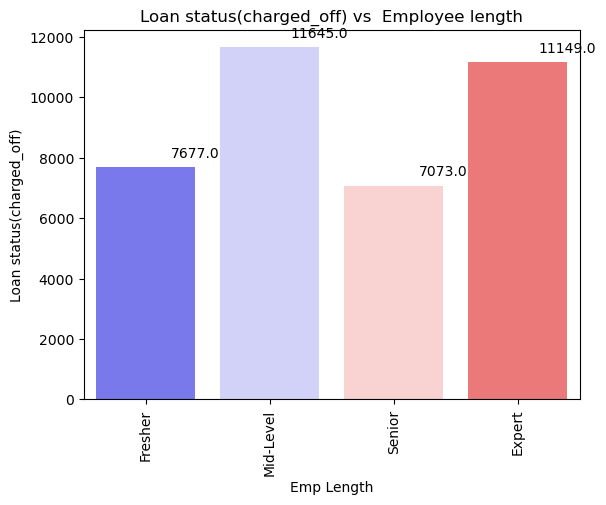

In [314]:
ax=sns.countplot(x = loan_df['emp_length_category'], data = loan_df[loan_df.loan_status == 'Charged Off'], palette='bwr') 
plt.title('Loan status(charged_off) vs  Employee length')
plt.xlabel('Emp Length')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

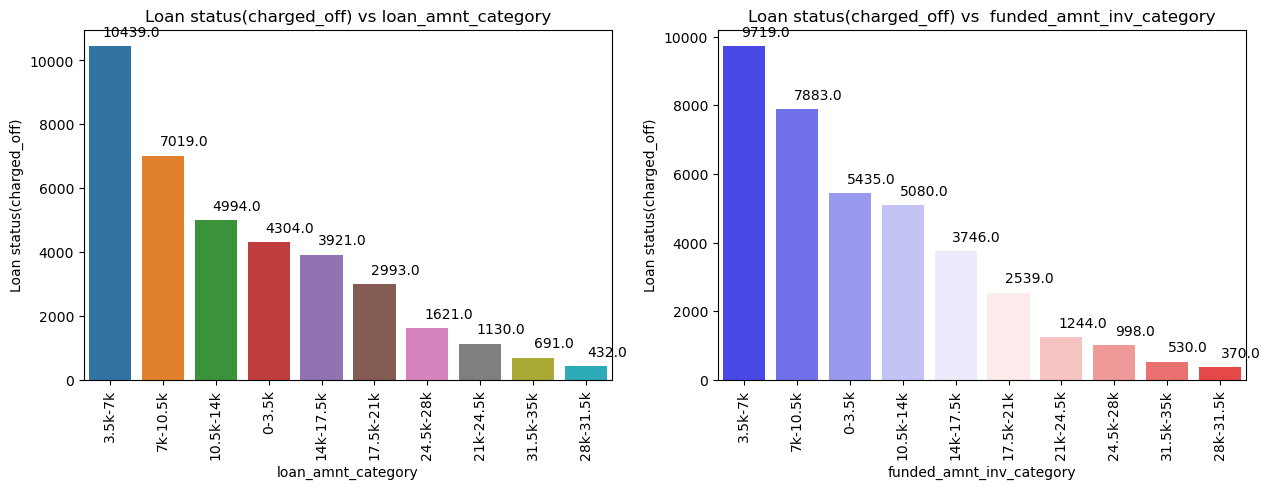

In [315]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
ax=sns.countplot(x = loan_df['loan_amnt_category'], data=loan_df[loan_df.loan_status == 'Charged Off'], order=loan_df.loan_amnt_category.value_counts().index)
plt.title('Loan status(charged_off) vs loan_amnt_category')
plt.xlabel('loan_amnt_category')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
plt.subplot(222)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax=sns.countplot(x = loan_df['funded_amnt_inv_category'],  data=loan_df[loan_df.loan_status == 'Charged Off'], order=loan_df.funded_amnt_inv_category.value_counts().index,palette='bwr')
plt.title('Loan status(charged_off) vs  funded_amnt_inv_category')
plt.xlabel('funded_amnt_inv_category')
plt.ylabel('Loan status(charged_off)')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

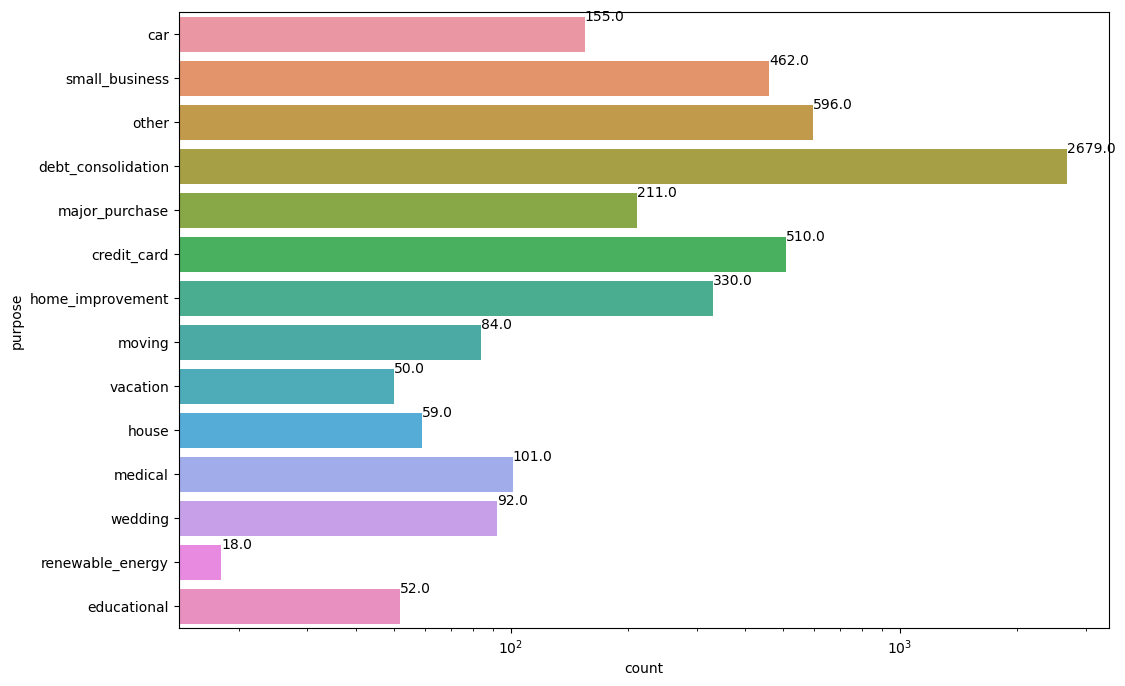

In [316]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
ax=sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y()),ha = 'left', va = 'center')

<Axes: xlabel='issue_d_Year', ylabel='count'>

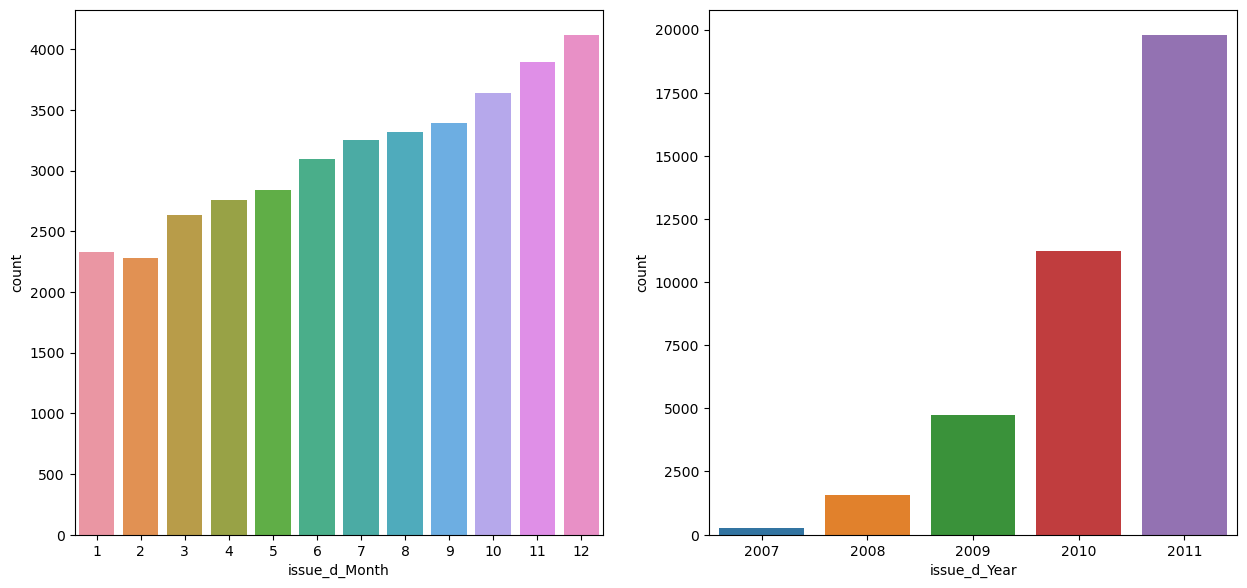

In [317]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_Month', data=loan_df)
plt.subplot(222)
sns.countplot(x='issue_d_Year', data=loan_df)

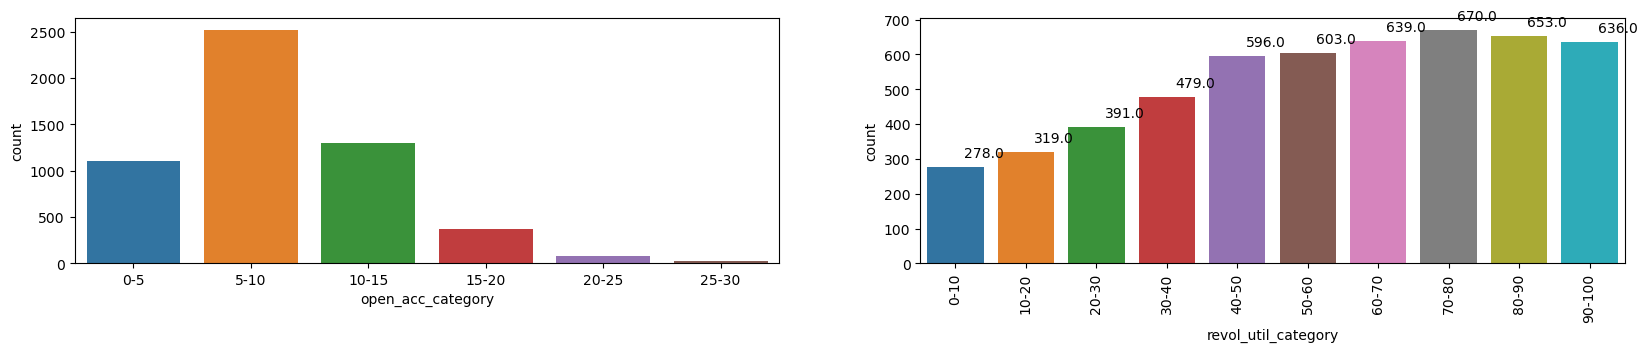

In [318]:
fig, ax = plt.subplots(figsize = (20,7))
plt.subplot(221)
ax=sns.countplot(x='open_acc_category', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.subplot(222)
ax=sns.countplot(x='revol_util_category', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [83]:
print()

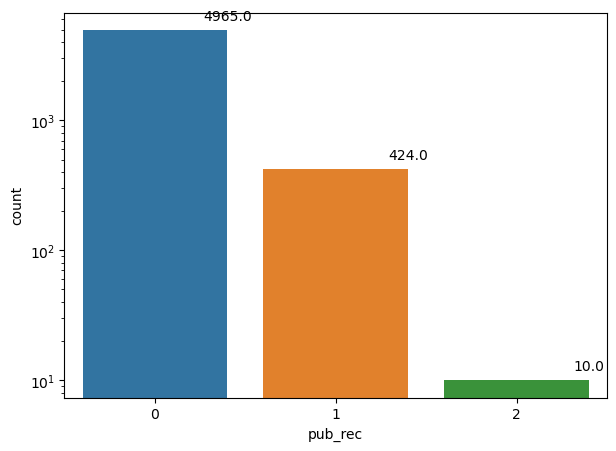

In [320]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
ax=sns.countplot(x='pub_rec', data=loan_df[loan_df.loan_status == 'Charged Off'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width(), p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<Axes: xlabel='home_ownership', ylabel='count'>

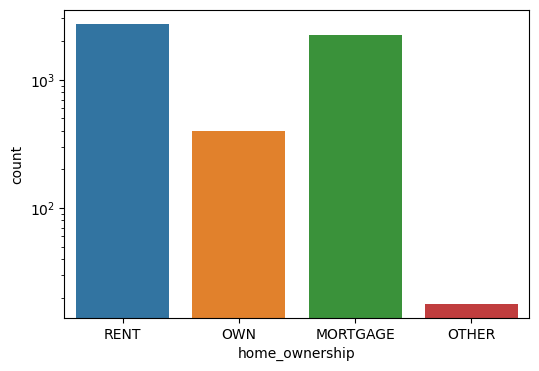

In [84]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

Text(0.5, 1.0, 'purpose vs dti')

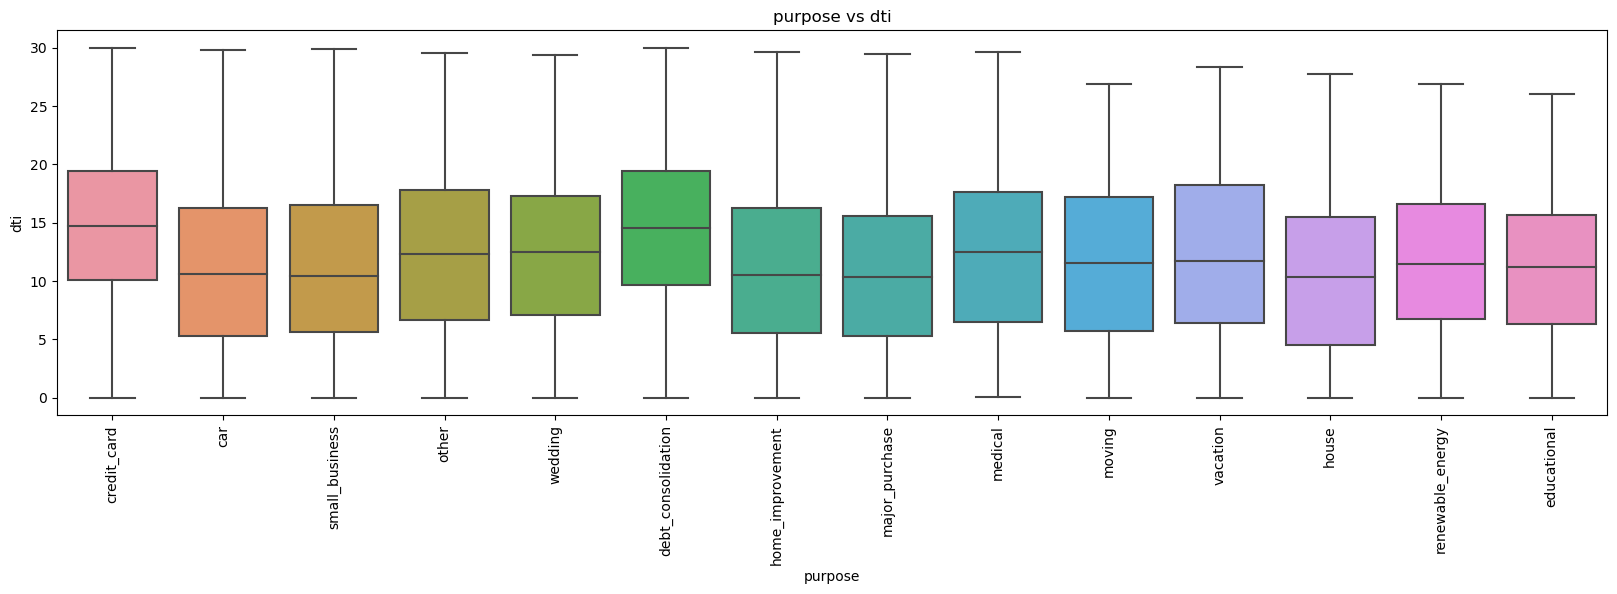

In [321]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_df.dti, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

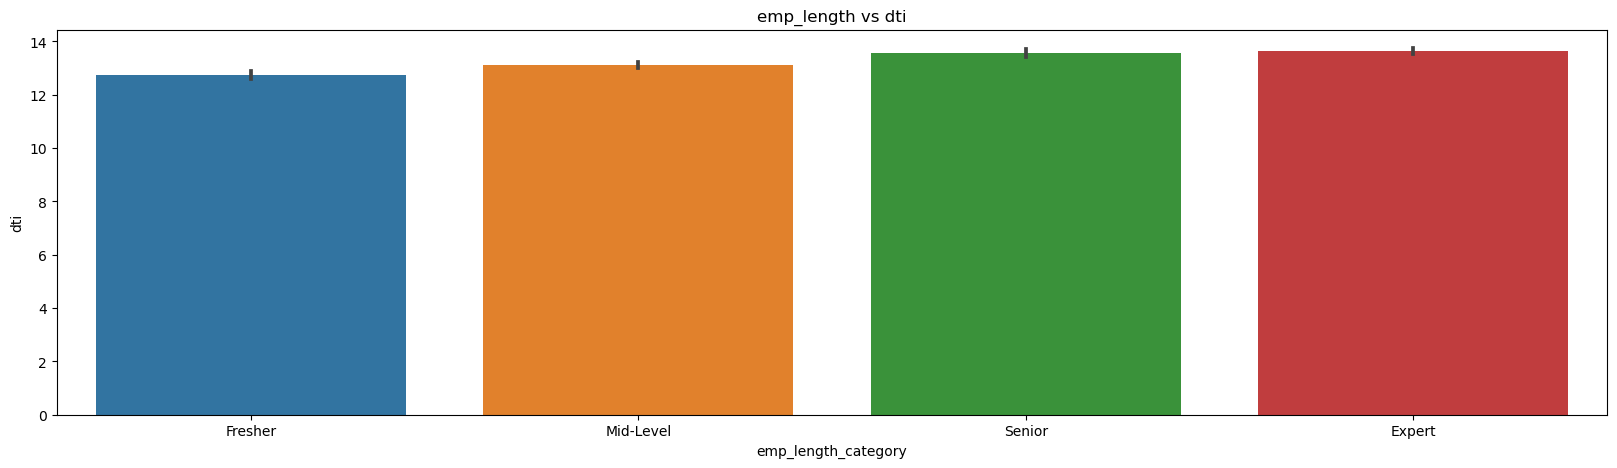

In [323]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='emp_length_category', y=loan_df.dti, data=loan_df)
plt.title('emp_length vs dti')

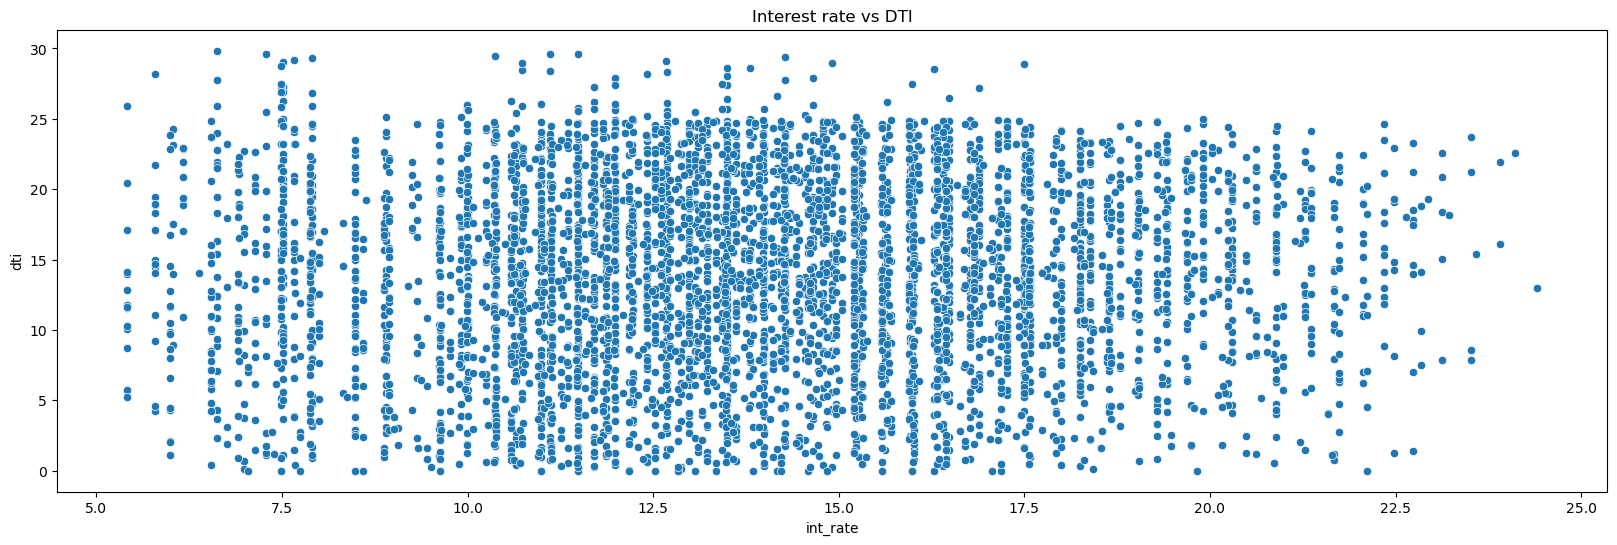

In [322]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.title('Interest rate vs DTI')
plt.show()

<Axes: xlabel='grade', ylabel='count'>

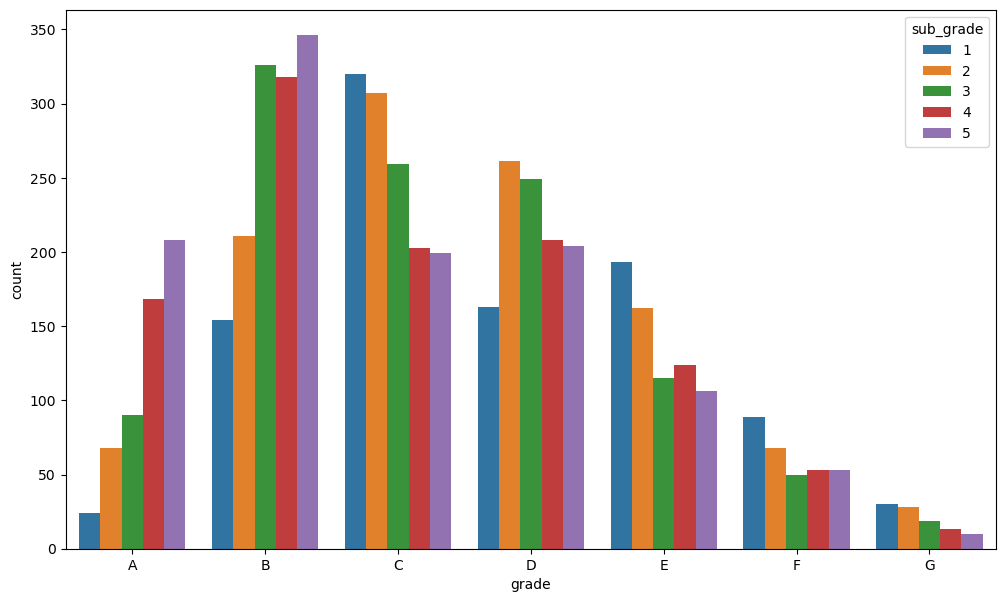

In [325]:
fig, ax = plt.subplots(figsize=(12,7))
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])

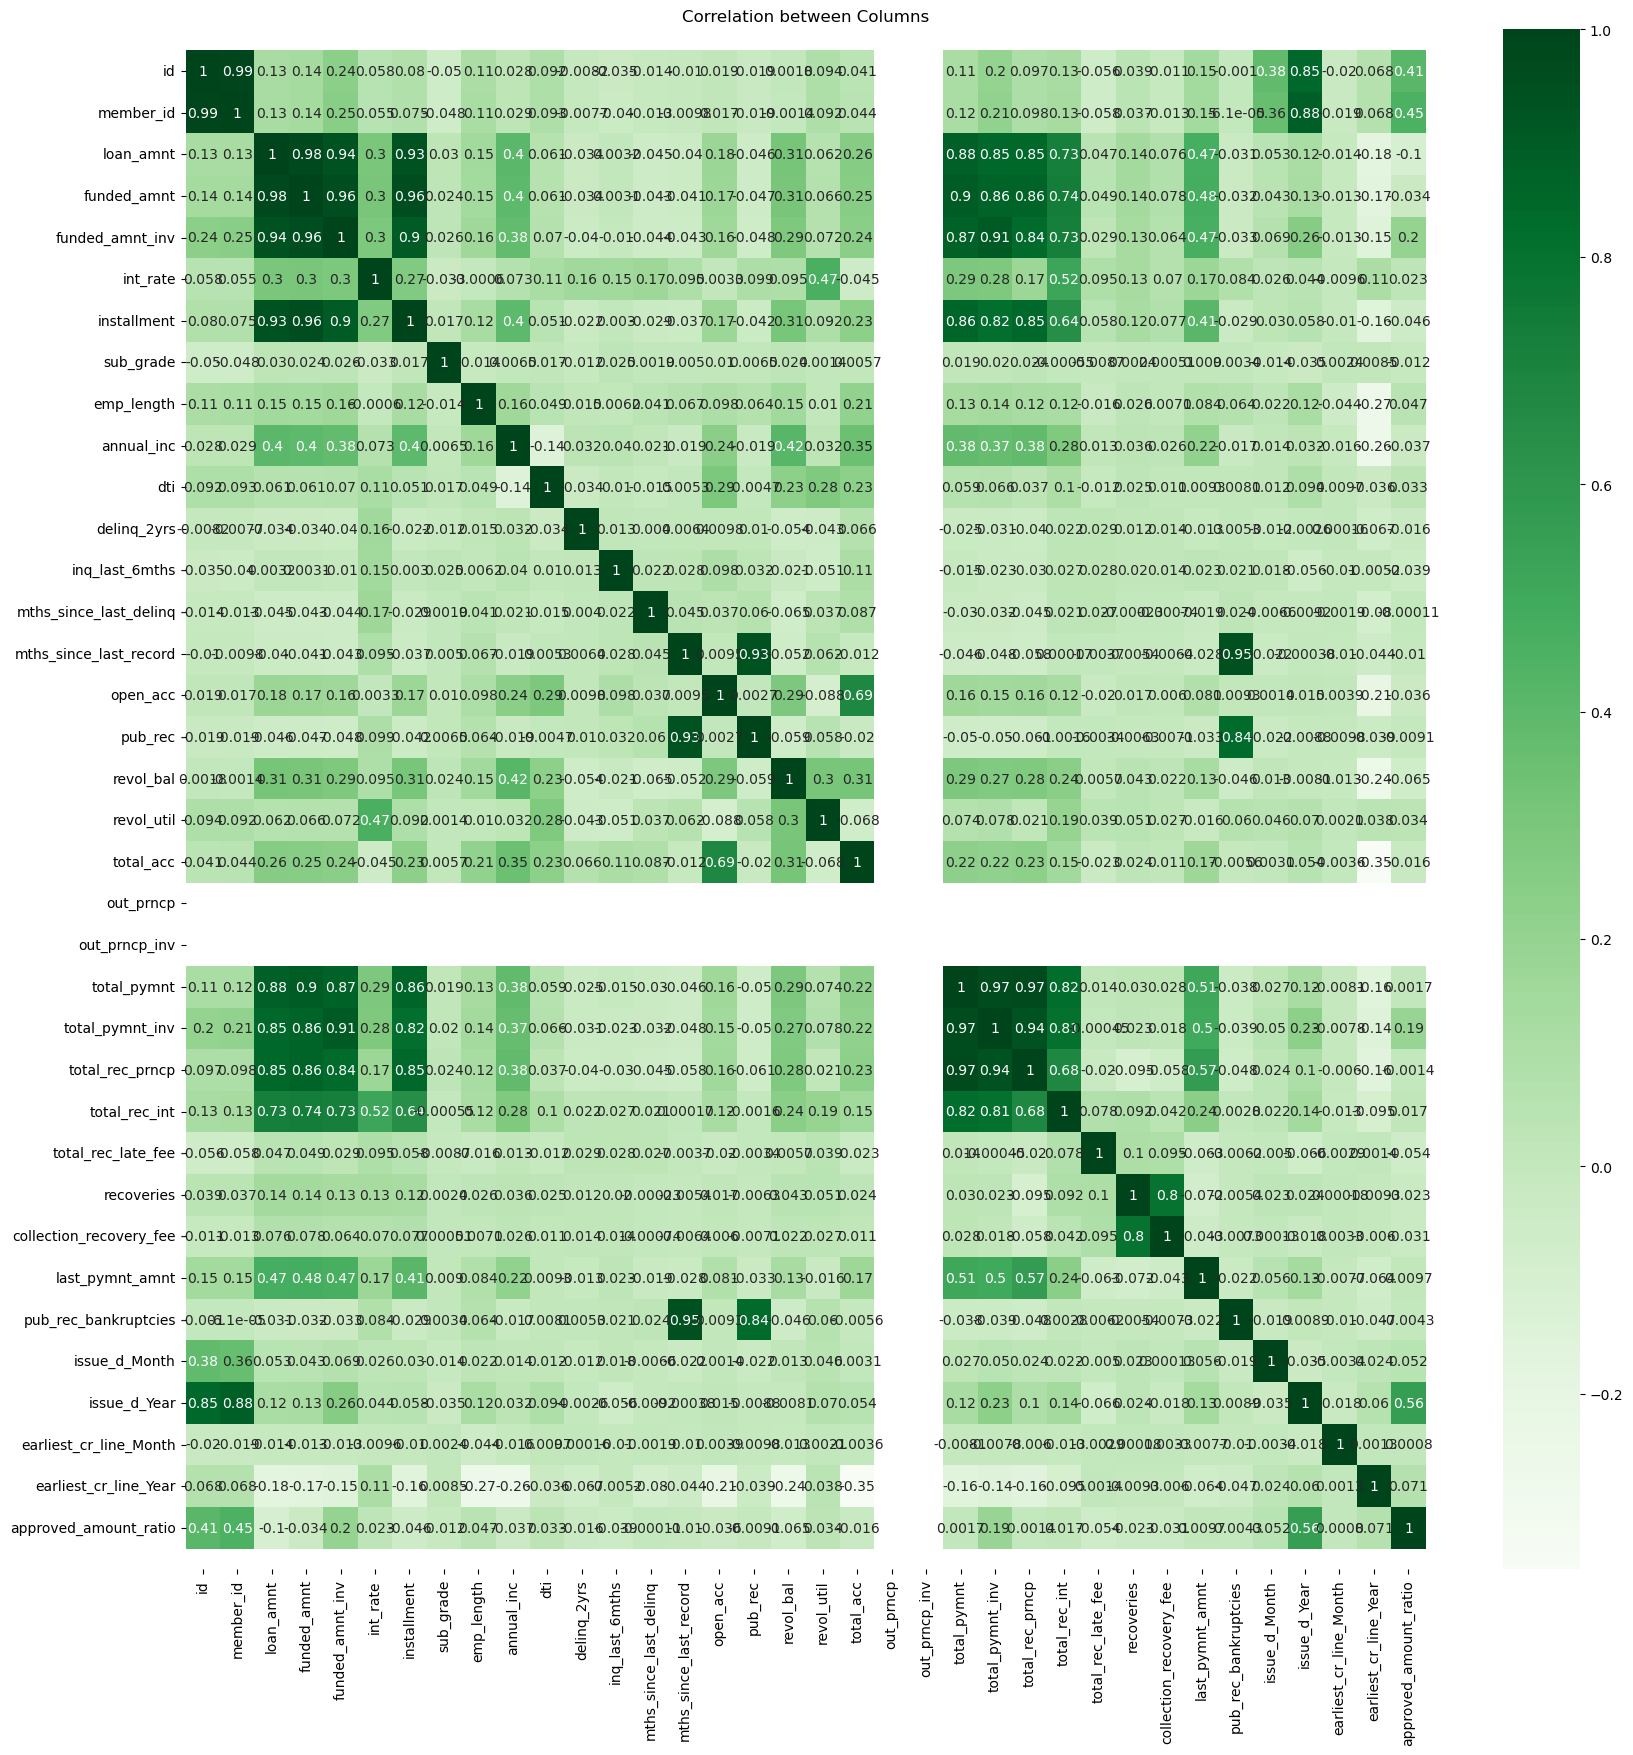

In [90]:
#Finding correlation matric
corr_matrix = loan_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

In [ ]:
##Observation

##Interest rates are high for Applicants with Credit card utilization.
##loan approved has high correlation with Year.